# Implementation project 3 (SVM) Arya Jalali 98105665 

In [5]:
!pip install --upgrade tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=d2cc54b2824865e071419c041a9e15dbef25df0f2849ddc29a53c5cce0022890
  Stored in directory: c:\users\arya\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor


In [1]:
!pip install pandas
!pip install --upgrade Pillow
!pip install -U scikit-learn
!pip install numpy
!pip install -U matplotlib
!pip install seaborn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.datasets import make_moons,make_circles
from keras.datasets import mnist
import pandas as pd
from sklearn.multiclass import OneVsRestClassifier
import seaborn as sns


def generate_dataset(min_value, max_value, size, positive_condition):
    data = pd.DataFrame(
        np.concatenate((
            np.random.uniform(min_value, max_value, (size, 2)),
            -np.ones((size, 1))), axis=1), 
        columns=['x', 'y', 'target'])
    data.target[positive_condition(data.x, data.y)] = 1
    return data

def plot_dataset():
  plt.figure(figsize=(10, 10))
  #Basic Shape
  plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=25, cmap=plt.cm.Paired)

def plot_support_vectors():
  plt.figure(figsize=(10, 10))
  plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=25, cmap=plt.cm.Paired)
  plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1], s = 25, c = 'yellow')

def plot_svm_result():
  plt.figure(figsize=(10, 10))
  ax = plt.gca()
  plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=25, cmap=plt.cm.Paired)
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()
  xx = np.linspace(xlim[0], xlim[1], 30)
  yy = np.linspace(ylim[0], ylim[1], 30)
  YY, XX = np.meshgrid(yy, xx)
  xy = np.vstack([XX.ravel(), YY.ravel()]).T
  Z = model.decision_function(xy).reshape(XX.shape)
  ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])

  ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=25,
            linewidth=1, facecolors='none', edgecolors='k')
  plt.show()

In [ ]:
for i in range

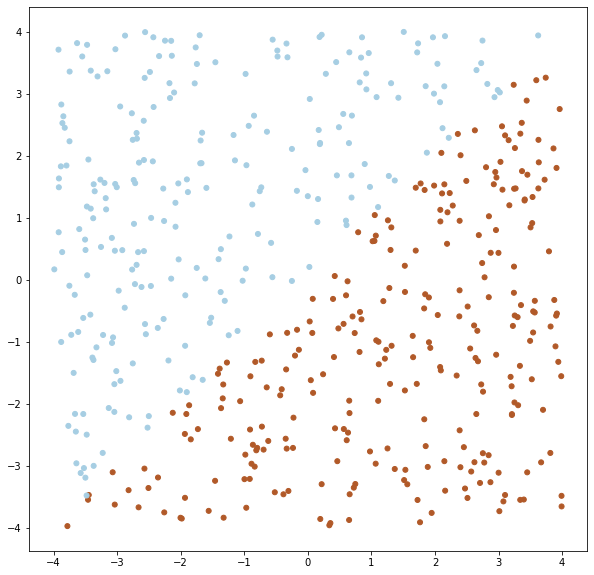

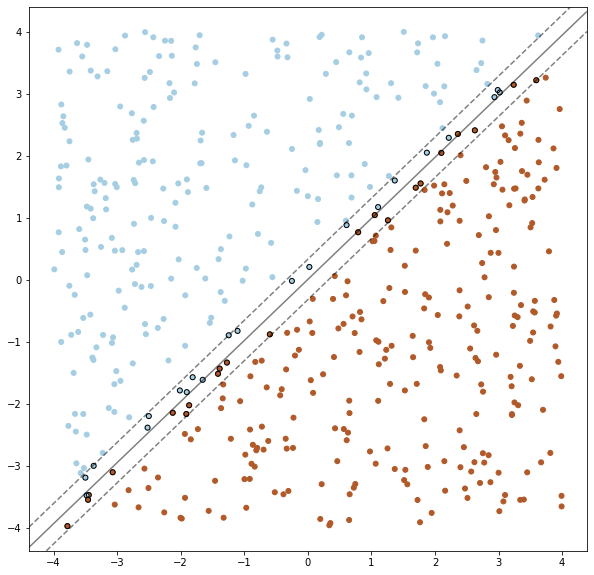

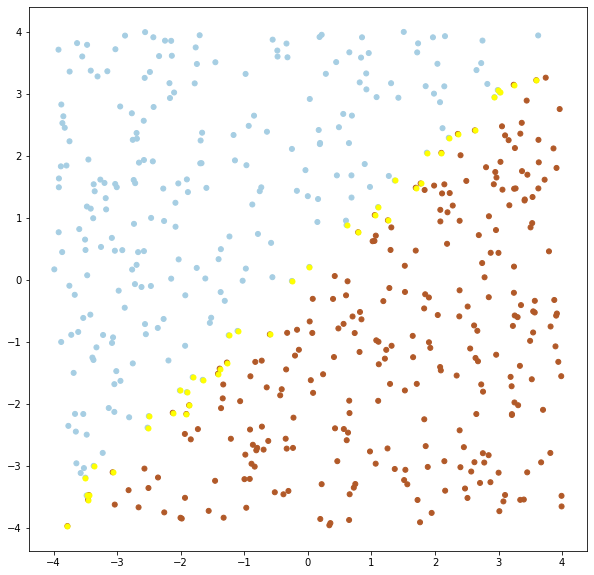

In [3]:

data = generate_dataset(-4,4,500,lambda x,y : x > y)

X=data.iloc[:,0:2]
y=data['target']

model = SVC(kernel='linear')
model.fit(X.values, y)
plot_dataset()
plot_svm_result()
plot_support_vectors()

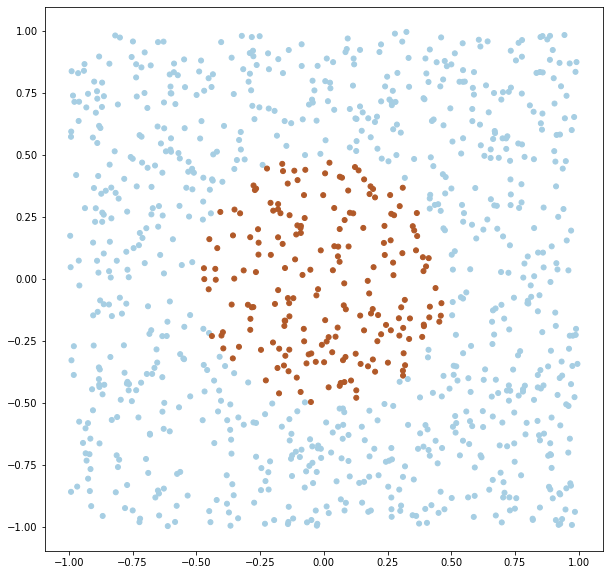

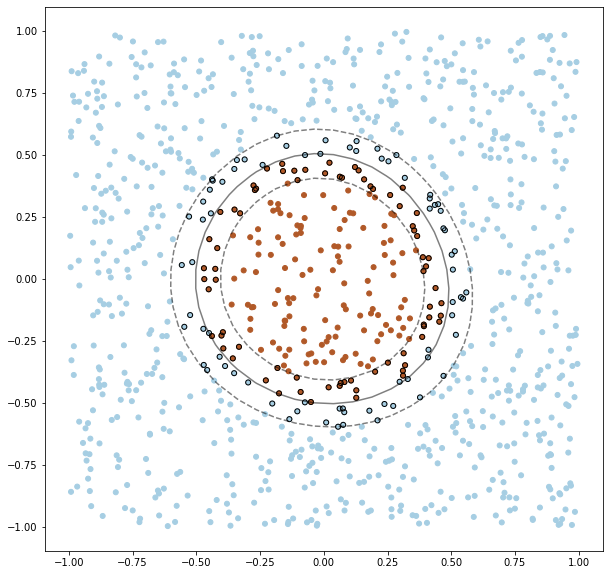

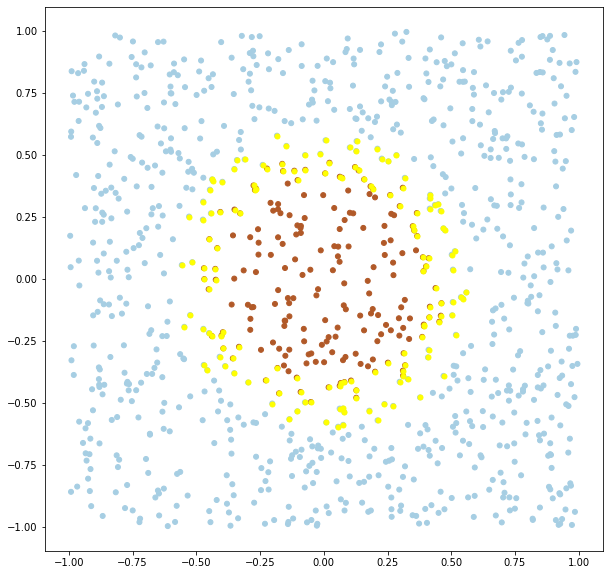

In [4]:
data = generate_dataset(-1,1,1000,lambda x,y : x**2 +y**2 < 1/4)

X=data.iloc[:,0:2]
y=data['target']

model = SVC(kernel='rbf')
model.fit(X.values, y)
plot_dataset()
plot_svm_result()
plot_support_vectors()

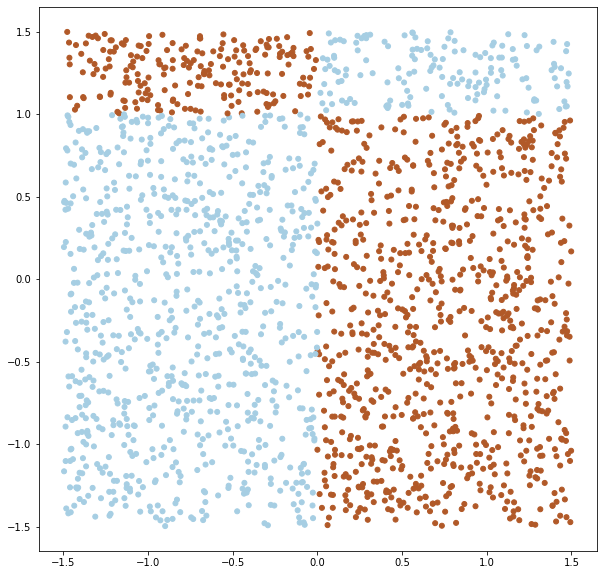

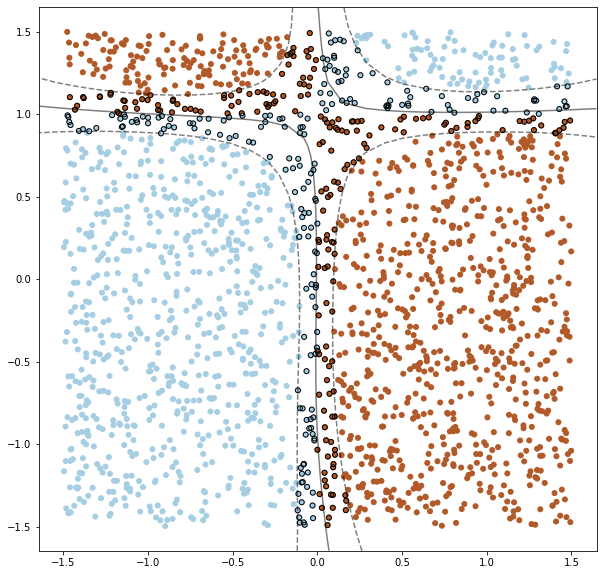

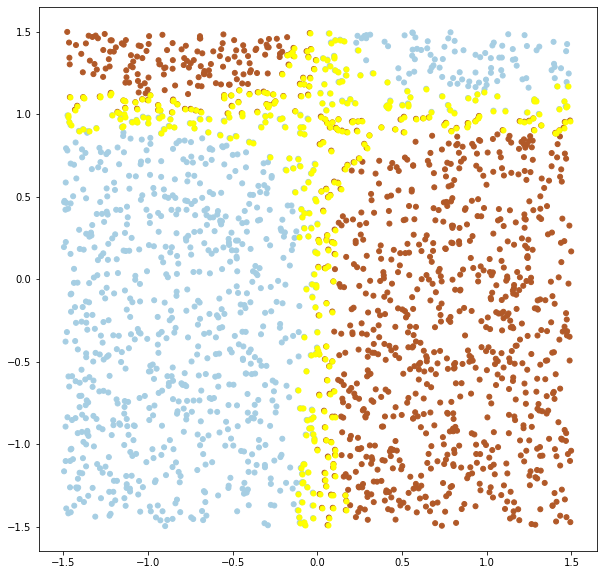

In [5]:
data = generate_dataset(-1.5,1.5,2000,lambda x,y : x > y*x)

X=data.iloc[:,0:2]
y=data['target']

model = SVC(kernel='rbf')
model.fit(X.values, y)
plot_dataset()
plot_svm_result()
plot_support_vectors()

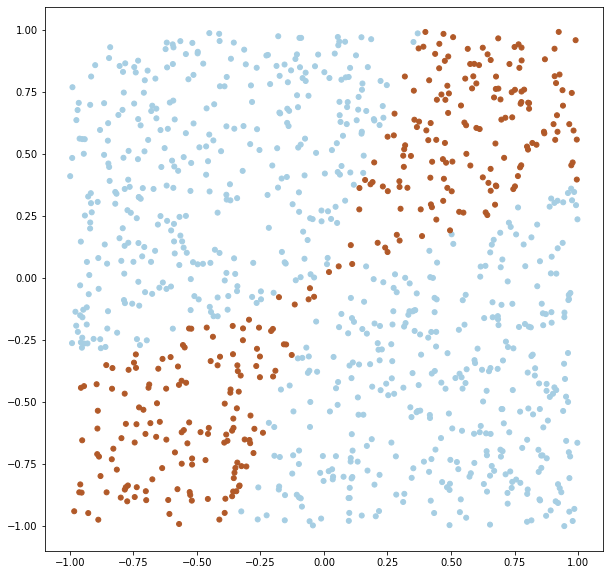

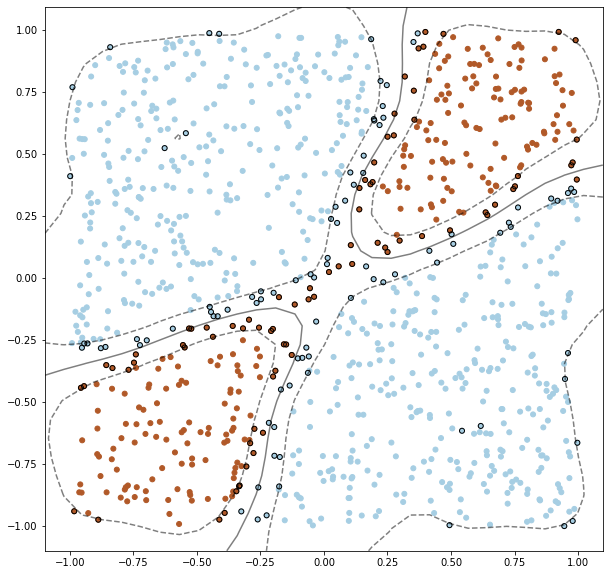

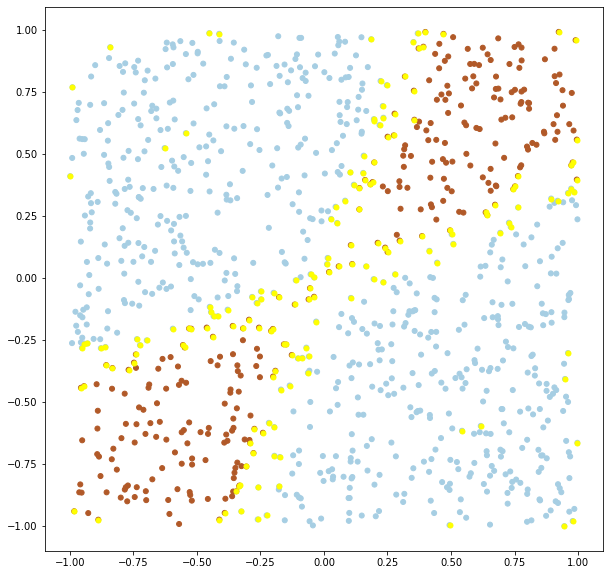

In [6]:
data = generate_dataset(-1,1,1000,lambda x,y : x**2 + y**2 < x * 3*y)

X=data.iloc[:,0:2]
y=data['target']

model = SVC(kernel='rbf',degree = 3, C = 1, gamma = 10)
model.fit(X.values, y)
plot_dataset()
plot_svm_result()
plot_support_vectors()

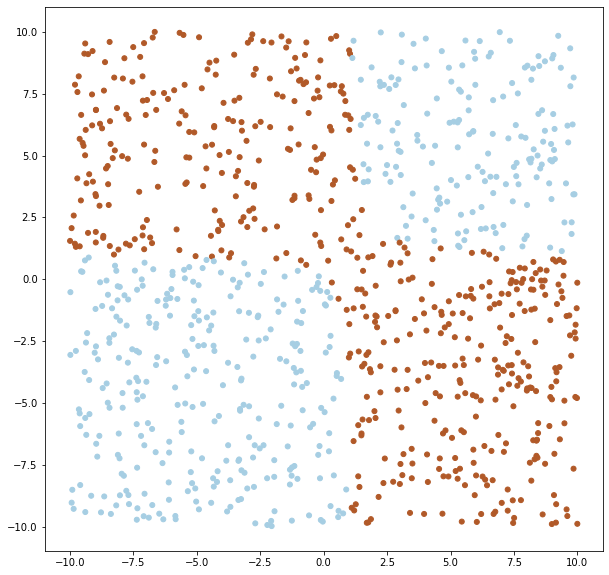

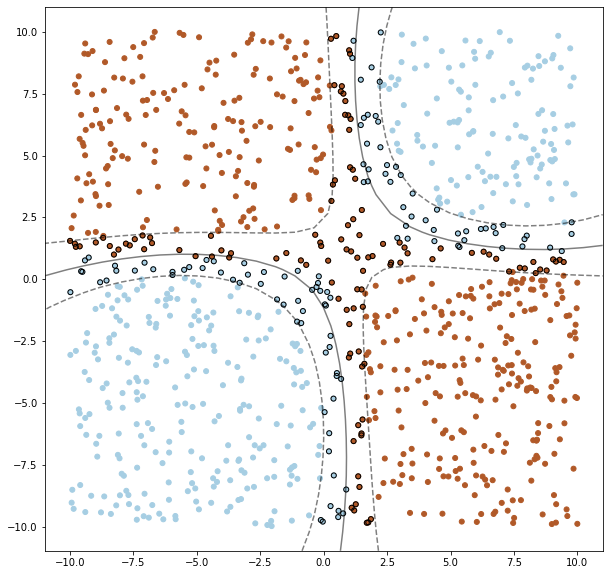

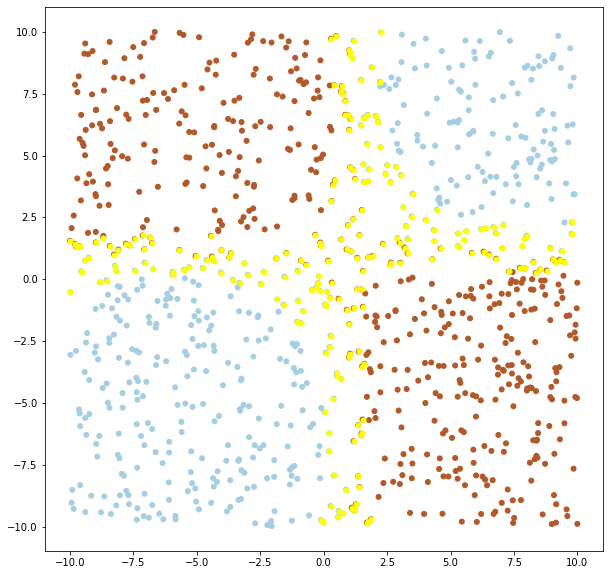

In [7]:
data = generate_dataset(-10,10,1000,lambda x,y : x*y < x + y)

X=data.iloc[:,0:2]
y=data['target']

model = SVC(kernel='rbf')
model.fit(X.values, y)
plot_dataset()
plot_svm_result()
plot_support_vectors()

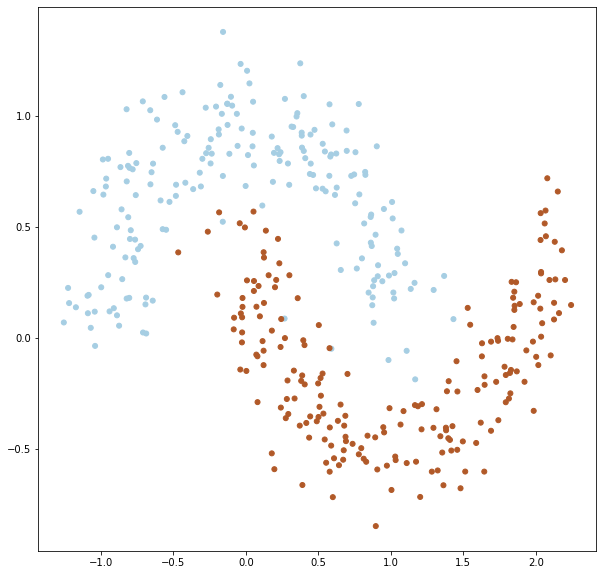

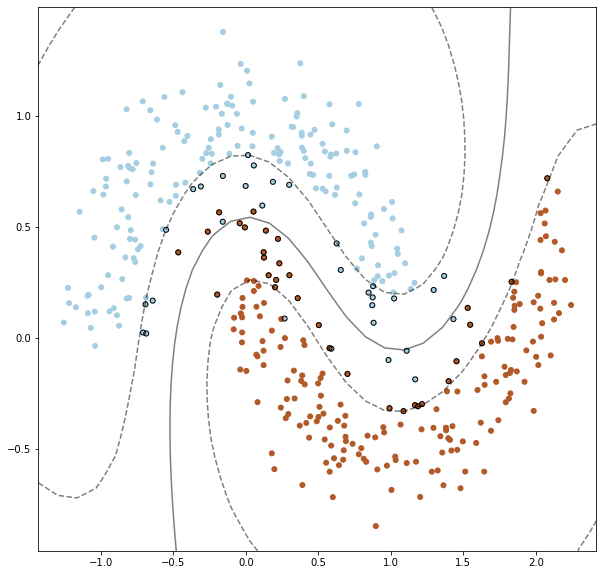

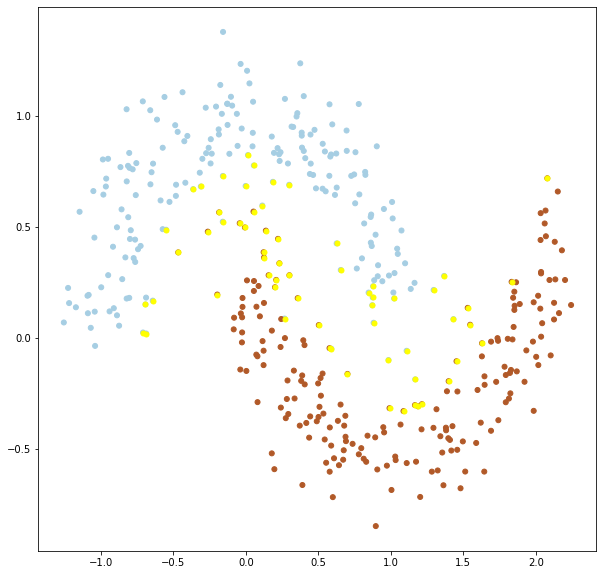

In [8]:
x,y = make_moons(400, shuffle = False,noise = 0.15)

data = np.vstack([x[:,0], x[:,1], y]).T
data = pd.DataFrame(data,columns=['x', 'y', 'target'])
data.head()

X=data.iloc[:,0:2]
y=data['target']

model = SVC(kernel='rbf')
model.fit(X.values, y)
plot_dataset()
plot_svm_result()
plot_support_vectors()

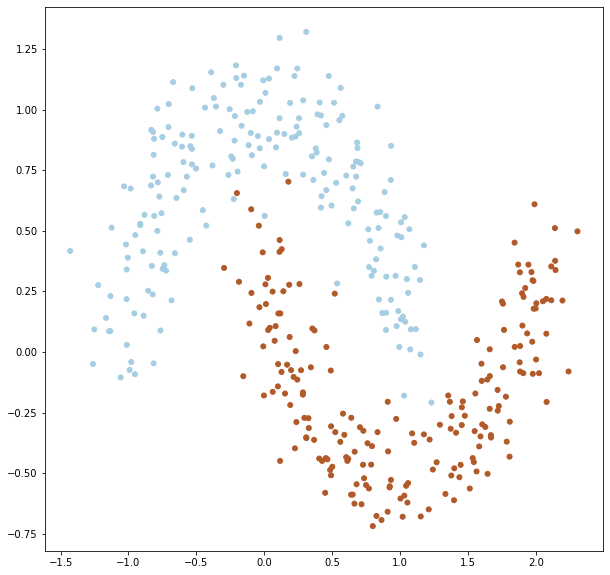

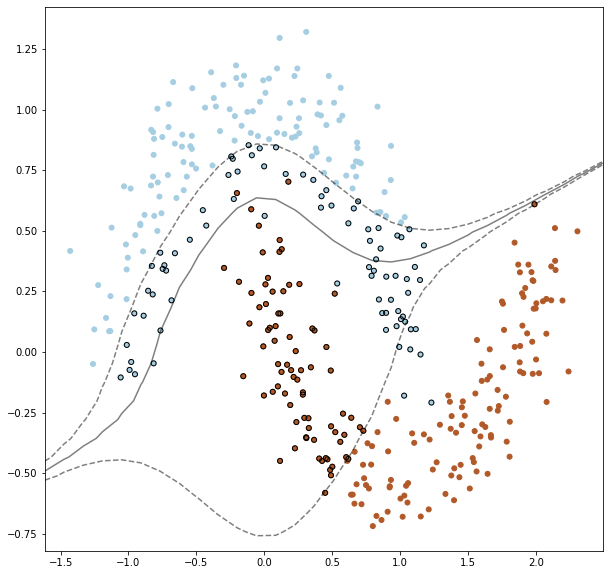

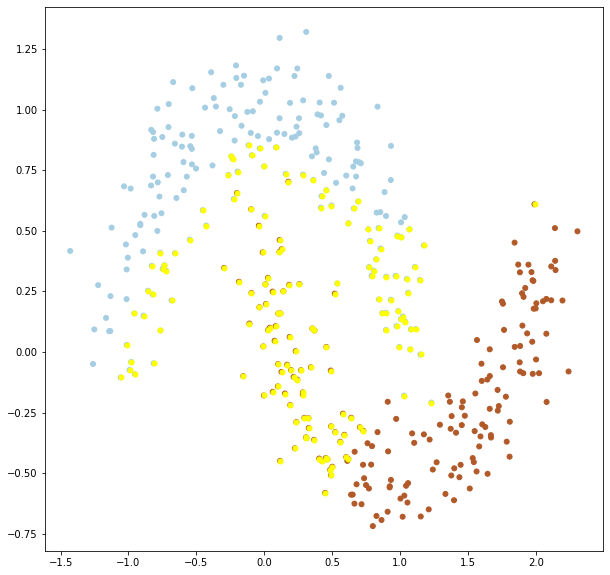

In [9]:
x,y = make_moons(400, shuffle = False,noise = 0.15)

data = np.vstack([x[:,0], x[:,1], y]).T
data = pd.DataFrame(data,columns=['x', 'y', 'target'])
data.head()

X=data.iloc[:,0:2]
y=data['target']

model = SVC(kernel='poly', degree = 5)
model.fit(X.values, y)
plot_dataset()
plot_svm_result()
plot_support_vectors()

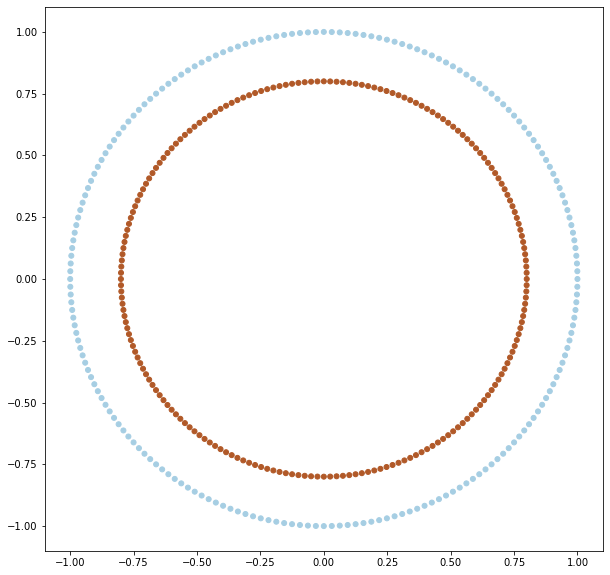

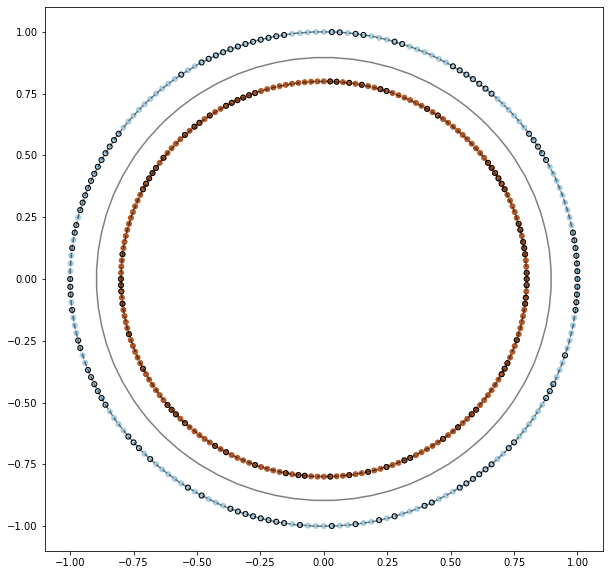

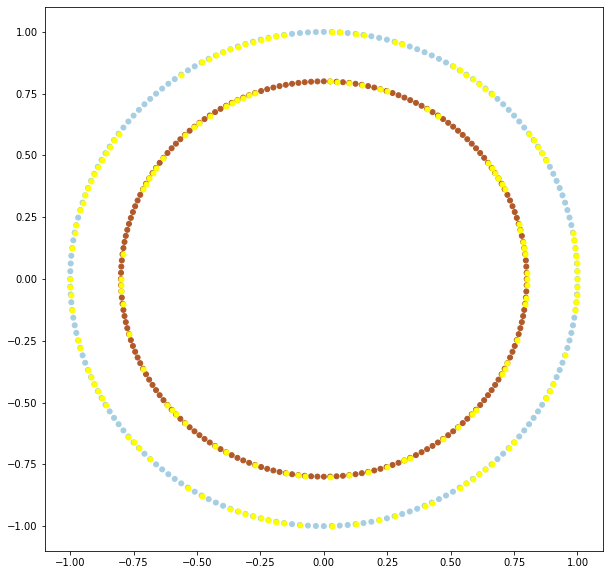

In [10]:
x,y = make_circles(400, shuffle = False,noise = 0)

data = np.vstack([x[:,0], x[:,1], y]).T
data = pd.DataFrame(data,columns=['x', 'y', 'target'])
data.head()

X=data.iloc[:,0:2]
y=data['target']

model = SVC(kernel='rbf', degree = 5)
model.fit(X.values, y)
plot_dataset()
plot_svm_result()
plot_support_vectors()

Fitting 5 folds for each of 15 candidates, totalling 75 fits


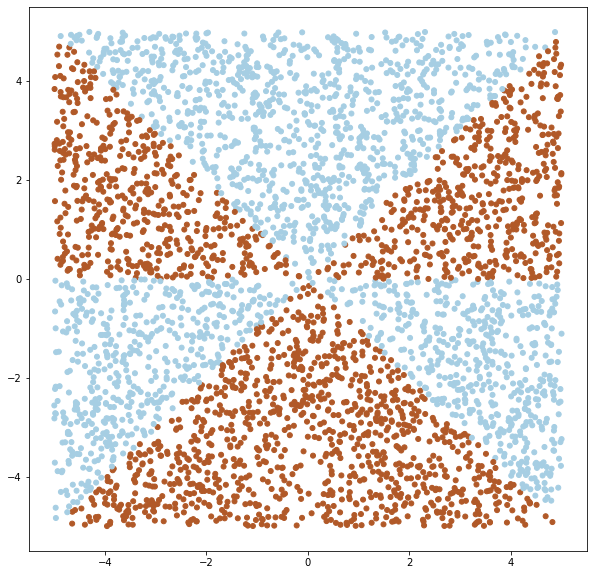

In [11]:
data = generate_dataset(-5,5,4000,lambda x,y :y * (np.abs(x) - np.abs(y)) > 0)

X=data.iloc[:,0:2]
y=data['target']

folds = KFold(n_splits = 5, shuffle = True)

hyper_params = [{'gamma': [1, 1e-1, 1e-2, 1e-3, 1e-4], 'C': [1, 5, 10]}]

# specify model
model = SVC(kernel="rbf")

model = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 2,
                        n_jobs = 8,
                        return_train_score=True)  
model.fit(data[['x', 'y']], data.target)
plot_dataset()

accuracy =  0.98475
{'C': 10, 'gamma': 1}


C:\Users\Arya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


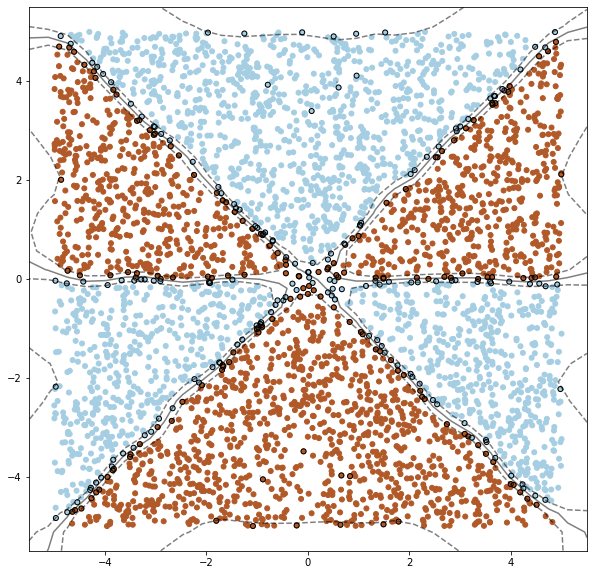

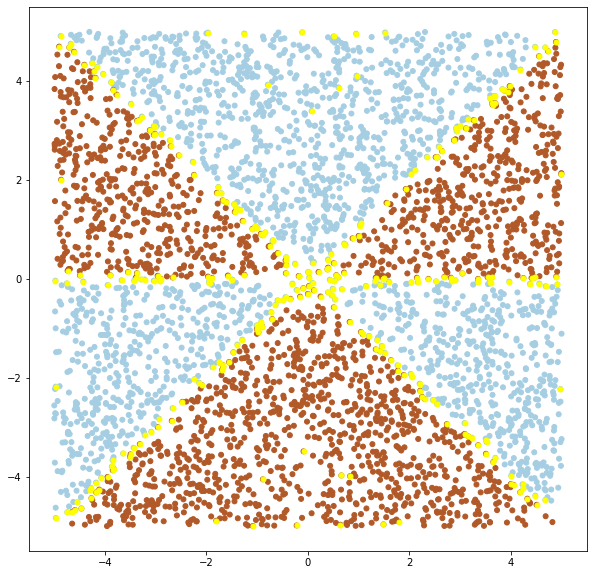

In [12]:
print('accuracy = ',model.best_score_)
print(model.best_params_)
model = model.best_estimator_
plot_svm_result()
plot_support_vectors()

Part 2:

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=SVC(kernel='linear'), n_jobs=8,
             param_grid=[{'C': [1, 5, 10],
                          'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=2)

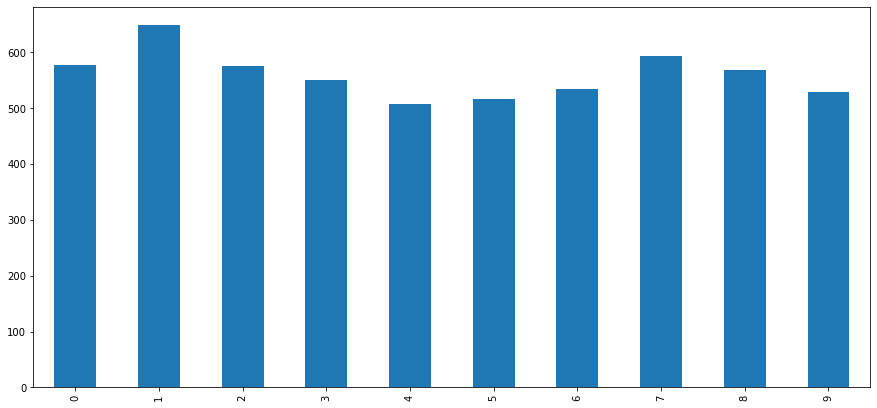

In [87]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X = np.concatenate((X_train, X_test)).reshape(70000, 28 * 28).astype('float32') / 255

y = np.concatenate((y_train, y_test)).reshape(70000)


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

seq = np.random.randint(0, len(x_train), len(x_train) // 10)
x_train,y_train = x_train[seq],y_train[seq]
seq = np.random.randint(0, len(x_test), len(x_test) // 10)
x_test,y_test = x_test[seq],y_test[seq]


plt.figure(figsize=(15, 7))
df = pd.DataFrame(np.sort(y_train), columns = ['digit'])



df['digit'].value_counts().sort_index().plot.bar()

folds = KFold(n_splits = 5, shuffle = True)

hyper_params = [{'gamma': [10, 1, 1e-1, 1e-2, 1e-3], 'C': [1, 5, 10]}]

# specify model
model = SVC(kernel="linear")

model = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 2,
                        n_jobs = 8,
                        return_train_score=True)  
model.fit(x_train, y_train)

In [88]:
print('accuracy = ',model.best_score_)
print(model.best_params_)
model = model.best_estimator_

accuracy =  0.9199999999999999
{'C': 1, 'gamma': 1}


In [89]:
y_pred = model.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.9085714285714286

In [90]:
# specify model
model = SVC(kernel="poly", degree = 5)

model = GridSearchCV(estimator = model,
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 2,
                        n_jobs = 8,
                        return_train_score=True)  
model.fit(x_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=SVC(degree=5, kernel='poly'), n_jobs=8,
             param_grid=[{'C': [1, 5, 10],
                          'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=2)

In [91]:
print('accuracy = ',model.best_score_)
print(model.best_params_)
model = model.best_estimator_

accuracy =  0.9028571428571428
{'C': 1, 'gamma': 1}


In [92]:
y_pred = model.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.9

In [95]:
# specify model
model = SVC(kernel="rbf")

model = GridSearchCV(estimator = model,
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 2,
                        n_jobs = 8,
                        return_train_score=True)  
model.fit(x_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=SVC(), n_jobs=8,
             param_grid=[{'C': [1, 5, 10],
                          'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=2)

In [96]:
print('accuracy = ',model.best_score_)
print(model.best_params_)
model = model.best_estimator_

accuracy =  0.9610714285714286
{'C': 10, 'gamma': 0.01}


In [97]:
y_pred = model.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.9664285714285714

Part 3:

In [185]:
x,y = [],[]
for path in os.listdir(path = '.'):
    if os.path.isdir(path) and len(path) == 1:
        for filename in os.listdir(path):
            f = os.path.join(path, filename)
            # checking if it is a file
            if os.path.isfile(f):
                x.append(np.array(Image.open(f)).reshape(1, 16 * 16))
                y.append(path)
                
x = np.array(x).astype('float32') / 255
y = np.array(y)
x = x.reshape(1500, 16 * 16)

In [187]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

folds = KFold(n_splits = 5, shuffle = True)

hyper_params = [{'gamma': [1, 1e-1, 1e-2, 1e-3, 1e-4], 'C': [1, 5, 10]}]

# specify model
model = SVC(kernel="linear")

model = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 2,
                        n_jobs = 8,
                        return_train_score=True)  


model.fit(x_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=SVC(kernel='linear'), n_jobs=8,
             param_grid=[{'C': [1, 5, 10],
                          'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=2)

In [188]:
print('accuracy = ',model.best_score_)
print(model.best_params_)
model = model.best_estimator_

accuracy =  0.9591666666666667
{'C': 1, 'gamma': 1}


In [189]:
y_pred = model.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.97

In [190]:
# specify model
model = SVC(kernel="poly", degree = 5)

model = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 2,
                        n_jobs = 8,
                        return_train_score=True)  


model.fit(x_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=SVC(degree=5, kernel='poly'), n_jobs=8,
             param_grid=[{'C': [1, 5, 10],
                          'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=2)

In [191]:
print('accuracy = ',model.best_score_)
print(model.best_params_)
model = model.best_estimator_

accuracy =  0.9541666666666666
{'C': 10, 'gamma': 0.01}


In [192]:
y_pred = model.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.9666666666666667

In [193]:
# specify model
model = SVC(kernel="rbf", degree = 5)

model = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 2,
                        n_jobs = 8,
                        return_train_score=True)  


model.fit(x_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=SVC(degree=5), n_jobs=8,
             param_grid=[{'C': [1, 5, 10],
                          'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=2)

In [194]:
print('accuracy = ',model.best_score_)
print(model.best_params_)
model = model.best_estimator_

accuracy =  0.9658333333333333
{'C': 10, 'gamma': 0.1}


In [195]:
y_pred = model.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.9666666666666667

In [196]:
def draw(images, texts, columns=1, rows=1, image_size=28, scale=4):
    fig = plt.figure(figsize=(scale * columns, scale * rows))

    for i in range(columns * rows):
        ax = fig.add_subplot(rows, columns, i + 1)
        ax.set_title(texts[i])
        ax.set_aspect('equal')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        plt.imshow(images[i].reshape(image_size, image_size) * 255)

    cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
    cax.get_xaxis().set_visible(False)
    cax.get_yaxis().set_visible(False)
    cax.set_frame_on(False)
    plt.show()

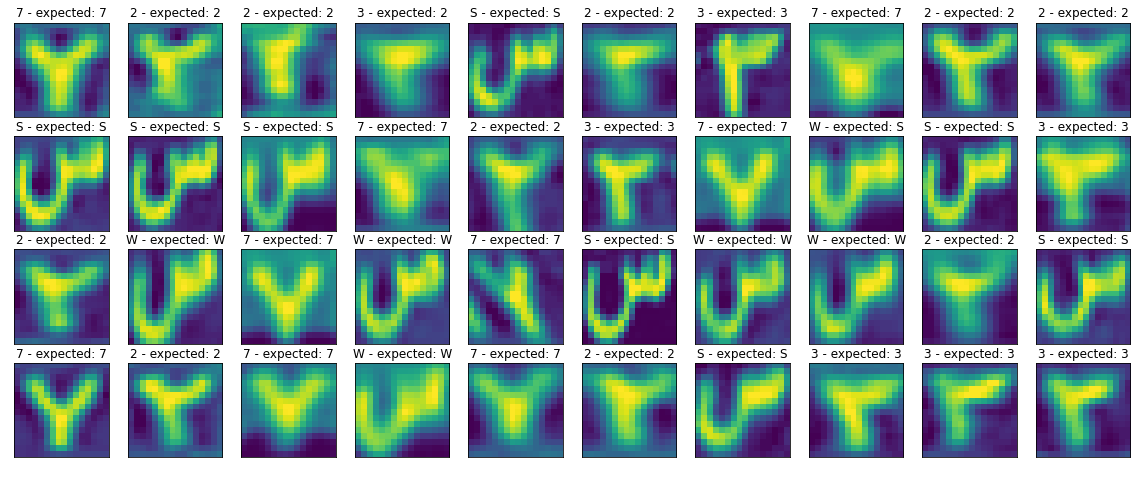

In [197]:
indices = np.random.choice(np.arange(len(x_test)), size=40)
images = x_test[indices]
predicted_digits = y_pred[indices]
texts = [f'{predicted_digits[i]} - expected: {y_test[indices[i]]}' for i in range(len(indices))]

draw(images, texts, 10, 4, image_size=16, scale=2)